# GRIP: The Spark Foundation

# Data Science Business Analytics Intern


# Author: SOURAV NAUTIYAL

# Task1: Predict the percentage of an student based on the no. of study                        hours and also What will be predicted score if a student studies for 9.25 hrs/ day?

Github Link:https://github.com/SouravNautiyal1/GRIP-JULY21-Internship-Task.git


Dataset Used: http://bit.ly/w-data

**Importing all required libraries**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error 
from sklearn.metrics import r2_score
%matplotlib inline

# Reading data from link

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully!!")


Data imported successfully!!


In [3]:
data.head(30)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Shape of the Dataset

In [4]:
data.shape

(25, 2)

# Checking the info of data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#Give Us Total Hours and Total Scores.
data.sum()  

Hours      125.3
Scores    1287.0
dtype: float64

In [7]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

**There are not null values in our dataset.**

# Check the Description of Student_score data:-

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization:-

**Now Let's plot a graph of our data so it will give us clear idea about data.**

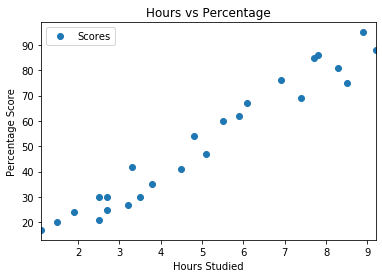

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


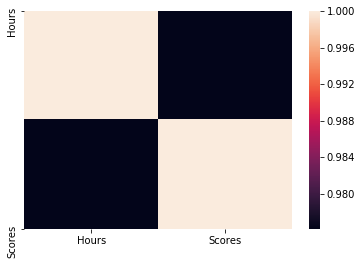

In [12]:
sns.heatmap(data.corr())
plt.show()

**Above figure gives us good picture of the positive relation.**


### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Linear Regression Model

**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**

**Split it into test data:-**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 
print("Size of training set :", len(X_train))
print("Size of test set :", len(X_test))

Size of training set : 20
Size of test set : 5


**The data has been splitted into (80 is to 20)% ratio. 80% data will be used to train our data and rest 20% will be used to test our model.**

# Train The Model

In [15]:
lr = LinearRegression()  
lr.fit(X_train, y_train) 
print("Model is Trained !!")

Model is Trained !!


### **Training the Algorithm**
**We have done to spliting our data into training and testing sets,and now is time to train our algorithm.**

In [18]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Training Complete.")

Training Complete.


# **Plotting the regression line.**

In [19]:
reg_coef = lr.coef_
print("Slope/Regression cofficient of the Model :",reg_coef[0])
reg_const = lr.intercept_
print("Intercept/Regression Constant of the model :", reg_const)

Slope/Regression cofficient of the Model : 9.910656480642237
Intercept/Regression Constant of the model : 2.018160041434683


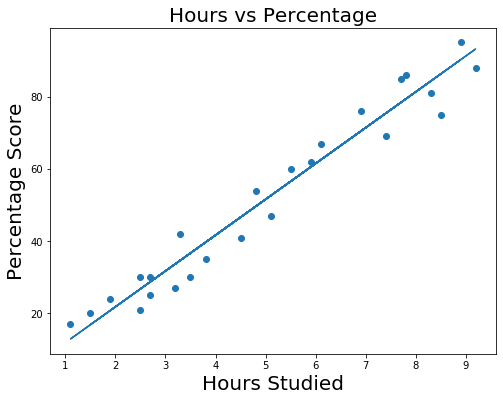

In [20]:
line = regressor.coef_*X+regressor.intercept_
plt.figure(figsize = (8,6))
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage',fontsize=20)  
plt.xlabel('Hours Studied',fontsize = 20)  
plt.ylabel('Percentage Score',fontsize = 20)  
plt.show()

# Checking the accuracy scores for training and test data

In [21]:
print("Test Scores:==" ,regressor.score(X_test,y_test))
print("Training Score:==",regressor.score(X_train,y_train))

Test Scores:== 0.9454906892105356
Training Score:== 0.9515510725211553


**Here we can see that our model is aprox 95% accurate to predict further.**

In [22]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

# Making Prediction

In [24]:
y_pred = lr.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# **Comparing Actual Data and predicted Data.**

In [25]:
data = pd.DataFrame({'Actual':y_test,'predicted':y_pred,"Difference/Error" : y_test-y_pred })
data

,Actual,predicted,Difference/Error
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


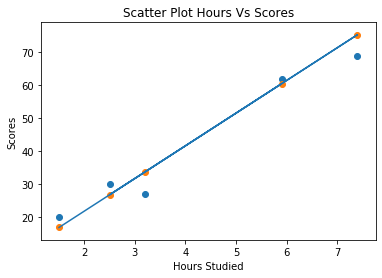

In [26]:

plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred)
plt.plot(X_test, y_pred)
plt.title("Scatter Plot Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

In [27]:
#Let's predict the score for 9.25 hours
print("score student who studied for 9.25 hours a data",regressor.predict([[9.25]]))
#Let us do more...

print("\nScore of student who srudied for.........\n")
print("5.78 hours a day is:- ",regressor.predict([[5.78]]))
print("3 hours a day is:- ", regressor.predict([[3]]))
print("4 hours a day is:- ", regressor.predict([[4]]))
print("5 hours a day is:- ", regressor.predict([[5]]))
print("6 hours a day is:- ", regressor.predict([[6]]))

score student who studied for 9.25 hours a data [93.69173249]

Score of student who srudied for.........

5.78 hours a day is:-  [59.3017545]
3 hours a day is:-  [31.75012948]
4 hours a day is:-  [41.66078596]
5 hours a day is:-  [51.57144244]
6 hours a day is:-  [61.48209893]


# Model Evaluation Metrics

**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.**

# Model Evaluation
for Evaluation of the Regression Model Sklearn module provide many metrics. We are going to evaluate our model:

1.**Mean Absolute Error** : It measures the average magnitute of the errors in a set of predictions, without considering their direction.



2.**Mean Sqaured Error** : It measures the average squared difference between the estimated values and the actual value.


3.**Root Mean Squared Error** : It is the square root of the average of squared differences between prediction and actual observation.

4.**$R^{2}$ Score** : It provides an indication of goodness of fit and therefore, a measure of how well unseen samples are likely to be predicted by model, through the proportion of explained variance. Best possible score is 1.0 and it can be negative(because the model can be arbitrarily worse).

**Checking the efficency model:.**

In [30]:
means_abs_error = mean_absolute_error(y_test,y_pred)
mean_squ_error = mean_squared_error(y_test,y_pred)


print("Mean Absolute Error: ", means_abs_error)
print("Mean Squard Error: ", mean_squ_error)



Mean Absolute Error:  4.183859899002975
Mean Squard Error:  21.5987693072174


#                 ".......Thank You !........."
